# autoencoder

In [86]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers,models

In [87]:
(xtrain , ytrain ), (xtest , ytest) = mnist.load_data()

In [88]:
(xtrain , ytrain ), (xtest , ytest) = mnist.load_data()

In [89]:
assert xtrain.shape == (60000,28,28)
assert ytrain.shape == (60000,)
assert xtest.shape == (10000,28,28)
assert ytest.shape == (10000,)

In [90]:
xtrain[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [91]:
normal_xtrain = ((xtrain * 10) / 255)
normal_xtrain[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [92]:
normal_xtrain.shape

(60000, 28, 28)

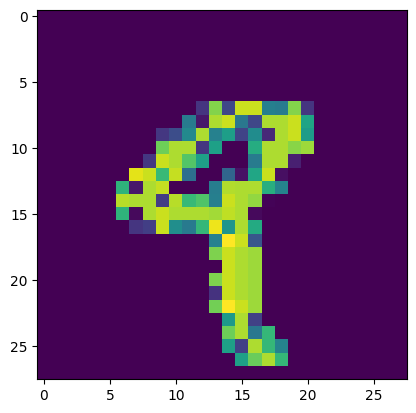

In [93]:
def plot_normal_img(image):
    plt.imshow(image)
    plt.show()
plot_normal_img(normal_xtrain[4])

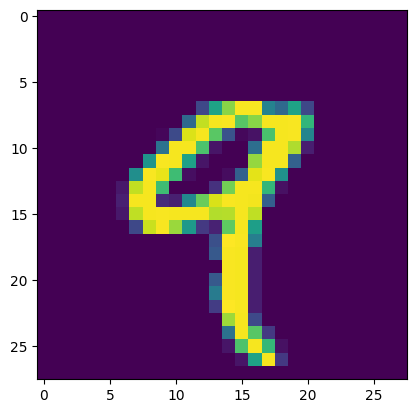

In [94]:
plot_normal_img(xtrain[4])

In [95]:
def generate_masked_inputs(x,p):
    mask = np.random.binomial(n = 1 , p=p , size = x.shape).astype('float32')
    return x*mask
masked_xtrain = generate_masked_inputs(normal_xtrain , 0.3)

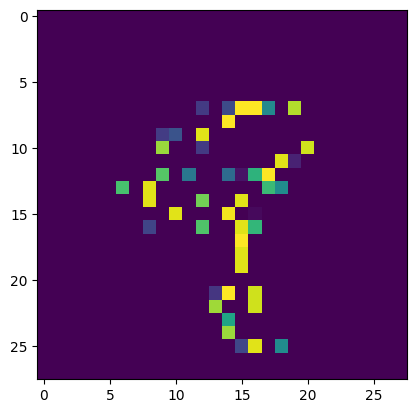

In [96]:
plot_normal_img(masked_xtrain[4])

In [97]:
autoencoder = models.Sequential([
    layers.Input(shape = (28,28)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu" , kernel_initializer = "he_normal"),
    layers.Dense(32, activation = "relu" , kernel_initializer = "he_normal"),
    layers.Dense(64, activation = "relu" , kernel_initializer = "he_normal"),
    layers.Dense(784, activation = "tanh"),
    layers.Reshape((28,28))
])
autoencoder.compile(loss= "mse" , optimizer = 'adam')
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history = autoencoder.fit(masked_xtrain,normal_xtrain , batch_size= 64 , epochs = 20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0401
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0326
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0313
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0305
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0299
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0294
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0290
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0288
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0285
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0283
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0282
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0280
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0278
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0276
Epoch 15/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - 

In [99]:
xtest_sample = xtest[:10] 
ytest_sample = ytest[:10] 
normal_xtest = (((xtest * 10) / 255))
masked_xtest = generate_masked_inputs(normal_xtest,0.3)
ypredict =autoencoder.predict(masked_xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step    


In [100]:
ypredict[4]

array([[-4.36463642e-06,  2.61011621e-07, -1.03890635e-07,
         3.37063757e-05,  6.22584707e-07,  7.24121628e-06,
         5.28803383e-08,  4.71814565e-06, -2.11709403e-06,
        -1.11801310e-05, -1.47416949e-05, -2.91684955e-05,
        -3.30054427e-05,  5.01760805e-05, -4.70185332e-05,
        -1.70941603e-05, -1.10367409e-05, -2.29983416e-05,
        -4.47064394e-06, -1.76963404e-05, -6.51394948e-05,
         4.23679521e-05, -5.29237468e-07, -1.79397139e-05,
         4.23547226e-06, -1.09829689e-05,  8.38507985e-05,
         3.69422160e-05],
       [-6.49169306e-06,  1.70552411e-07,  4.84547445e-06,
        -2.86149634e-06,  1.70836720e-05,  5.77894480e-06,
        -7.05843995e-05, -2.88372580e-03, -1.59016950e-03,
        -1.86603179e-03,  4.24317922e-03,  5.05752908e-03,
         1.55355351e-03,  4.41676908e-04,  2.56567099e-03,
         3.22710257e-03,  3.64402472e-03,  3.09715746e-03,
        -6.14542631e-04, -7.92573148e-04, -8.56949307e-04,
        -1.70946762e-04, -9.50

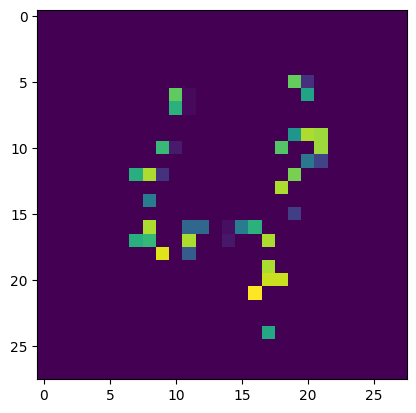

In [101]:
plot_normal_img(masked_xtest[4])

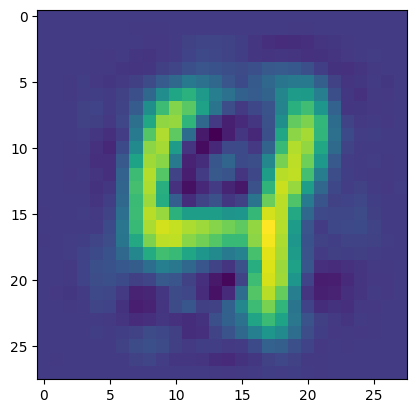

In [102]:
plot_normal_img(ypredict[4])